PROBLEM 4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding,SpectralEmbedding,MDS
from time import time 
from matplotlib.ticker import NullFormatter
import scipy.io

first load the face.mat file and then create a matrix X with the shape 33,1034, below code the specify the preprocessing of data

In [ ]:
x=scipy.io.loadmat('face.mat')
x.keys
Y=x['Y']
print(Y.shape)
o_id = x['id'] 
o_id=np.reshape(o_id,(33,)) 
print(o_id)
arg_id = np.argsort(o_id) 
arg_id = arg_id[::-1] 
print(arg_id)
X=np.reshape(Y,[10304,33]).T 
print(X.shape)

(112, 92, 33)
[29 21 15  2 32 16  6 31 17 27 33 18 22 24 28 13 12  8  1 23 26 10 25  7
  5 11 20  4  3 14 19  9 30]
[10  4  7 32  0 14  9 20 22 13 19 12  1 26 30 11  8  5  2 29 15 16 25 21
 31 17 23  6 24 27 28  3 18]
(33, 10304)


From the above matrix we can able print the faces acccordingly

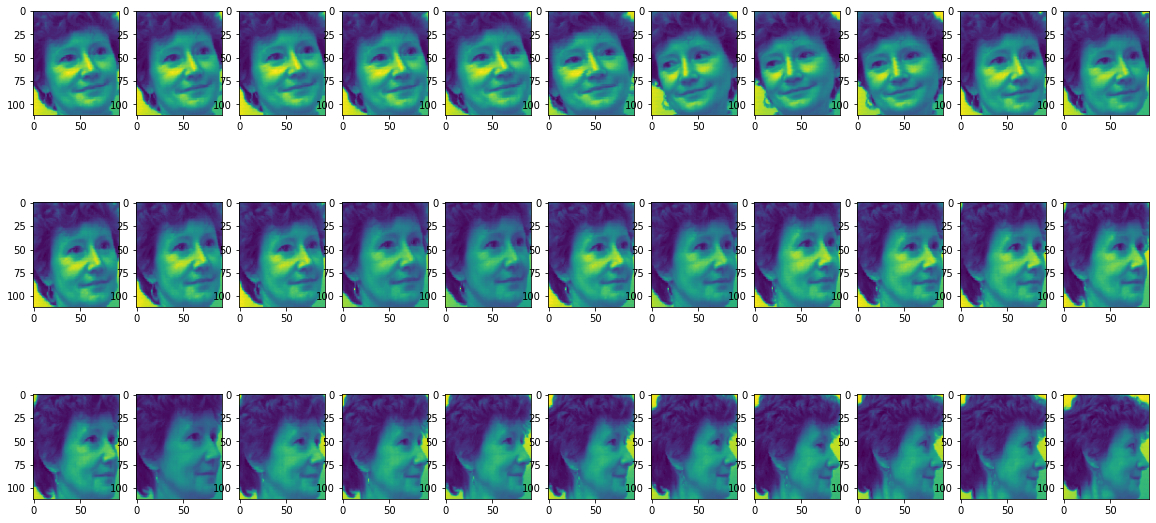

In [ ]:
plt.figure(figsize=(20,10))

for i in range (33):
  plt.subplot(3, 11, i+1) 
  plt.imshow(Y[:,:,arg_id[i]]) 
plt.show()
 

4.1)MDS Implementation  we can use the 1st eigenvector and visualize your results with figures.

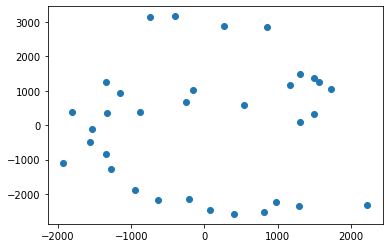

In [ ]:
mds = MDS(n_components=2, max_iter=2000, n_init=1) 
face_mds = mds.fit_transform(X)
plt.scatter(face_mds[:,0],face_mds[:,1])

performing an indirect sort along the given axis

In [ ]:
mds_id = np.argsort(face_mds[:,0]) 
print(mds_id)

[21  2 15 29 30 16  5 25 11 31  8  9 17 20 26 23  1  6 14 24 12 27 22 28
 32  3 19  7 13  4 10  0 18]


Plotting the figures with the implemnatation of MDS

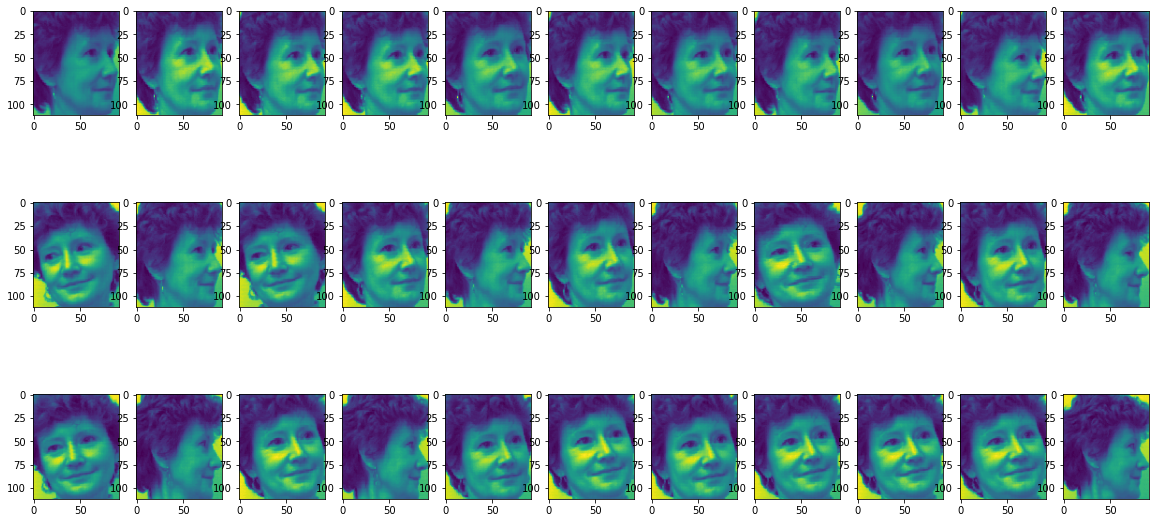

In [ ]:
plt.figure(figsize=(20,10))
for i in range (33): 
  plt.subplot(3, 11, i+1) 
  plt.imshow(Y[:,:,mds_id[i]]) 
plt.show()

we can see from the above MDS some of the face are incorrectly ordered

4.2) Isomap implementation with k = 5 nearest neighbor graph

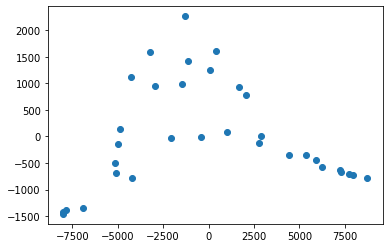

In [ ]:
isomap=Isomap(n_neighbors=5,n_components=2)
face_isomap = isomap.fit_transform(X)
plt.scatter(face_isomap[:,0],face_isomap[:,1])

In [ ]:
isomap_id = np.argsort(face_isomap[:,0]) 
print(isomap_id)

[ 9 20 22 14  4 10  0 32 13  7 19 12  1 26 30 11  8  5  2 29 15 16 25 21
 31 17 23  6 24 27 28  3 18]


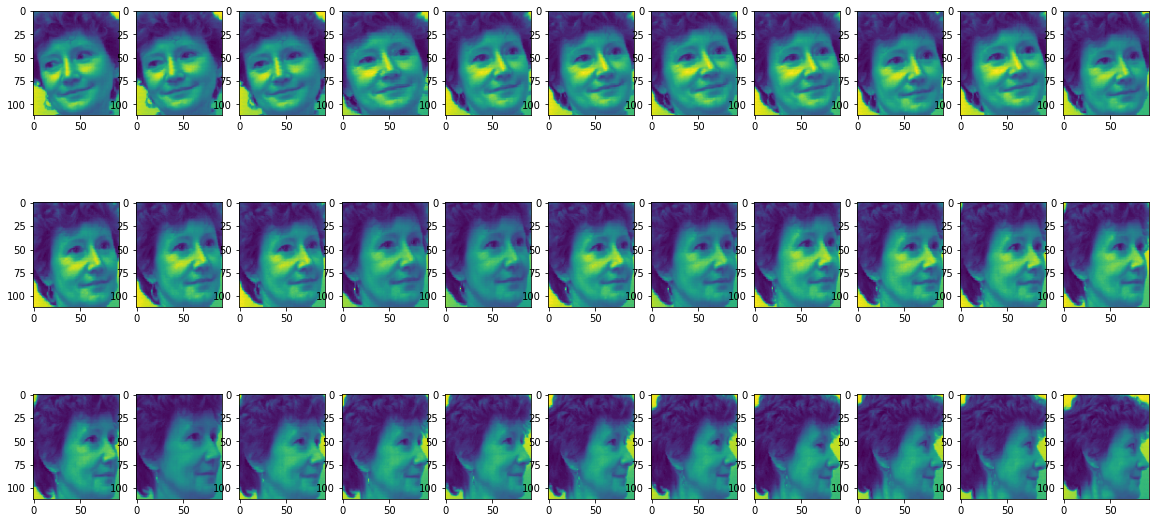

In [ ]:
plt.figure(figsize=(20,10))

for i in range (33): 
  plt.subplot(3, 11, i+1) 
  plt.imshow(Y[:,:,isomap_id[i]]) 
plt.show()


Now, we can compare the graphs between the MDS and Isomap, we can see that Isomap is better than the MDS

Text(0.5, 1.0, 'ISOMAP-embedding')

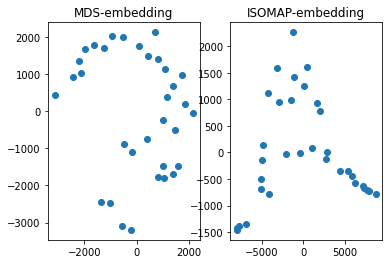

In [ ]:
mds = MDS(n_components=2, max_iter=2000, n_init=1) 
face_mds = mds.fit_transform(X)
plt.subplot(1, 2, 1)
plt.scatter(face_mds[:,0],face_mds[:,1])
plt.title('MDS-embedding')

isomap=Isomap(n_neighbors=5,n_components=2)
face_isomap = isomap.fit_transform(X)
plt.subplot(1, 2, 2)
plt.scatter(face_isomap[:,0],face_isomap[:,1])
plt.title('ISOMAP-embedding')


4.3) LLE Implementation of 33 faces on the k = 5 nearest
neighbor graph 

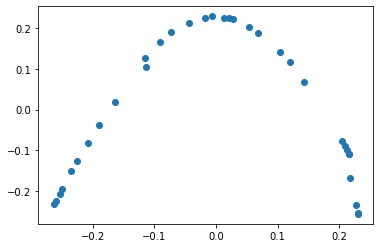

In [ ]:
lle = LocallyLinearEmbedding(n_neighbors=5, n_components=2, method='standard', eigen_solver='auto')
face_lle = lle.fit_transform(X)
plt.scatter(face_lle[:, 0], face_lle[:, 1]) 

In [ ]:
lle_id = np.argsort(face_lle[:,0]) 
print(lle_id)

[18  3 28 27 24  6 23 17 31 25 21 16 15 29  2  5  8 11 30 26  1 12 19 13
 32  0  7 10  4 14 22 20  9]


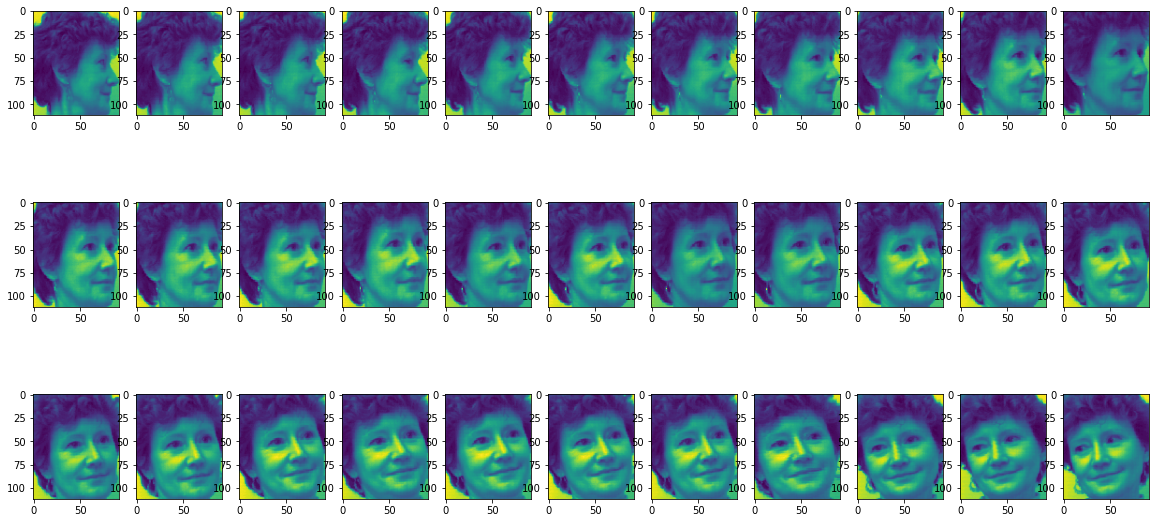

In [ ]:
plt.figure(figsize=(20,10))
for i in range (33): 
  plt.subplot(3, 11, i+1) 
  plt.imshow(Y[:,:,lle_id[i]]) 
plt.show()

Now we can Compare the Isomap with the LLE, we can see that Iso map is mostly simliar to the LLE, but the LLE produce some what better result than the Isomap

Text(0.5, 1.0, 'Locality Linear Embedding')

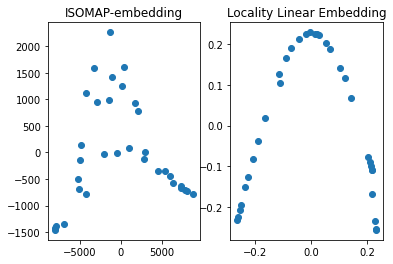

In [ ]:
isomap=Isomap(n_neighbors=5,n_components=2)
face_isomap = isomap.fit_transform(X)
plt.subplot(1, 2, 1)
plt.scatter(face_isomap[:,0],face_isomap[:,1])
plt.title('ISOMAP-embedding')



lle = LocallyLinearEmbedding(n_neighbors=5, n_components=2, method='standard', eigen_solver='auto')
face_lle = lle.fit_transform(X)
plt.subplot(1,2,2)
plt.scatter(face_lle[:, 0], face_lle[:, 1])
plt.title('Locality Linear Embedding')

LE Implementation of the 33 faces on the k = 5 nearest neighbor
graph

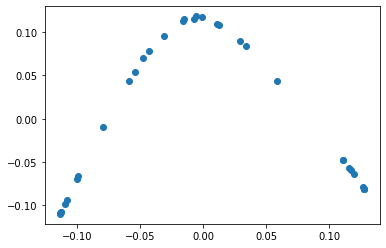

In [ ]:
spe = SpectralEmbedding(n_neighbors=5,n_components=2) 
face_spe = spe.fit_transform(X)
plt.scatter(face_spe[:,0],face_spe[:,1])

In [ ]:
spe_id = np.argsort(face_spe[:,0]) 
print(spe_id)

[18  3 28 27 24  6 23 17 31 21 25 16 15 29  5  2  8 11 30 26  1 12 19 13
 32  4  7  0 10 14  9 20 22]


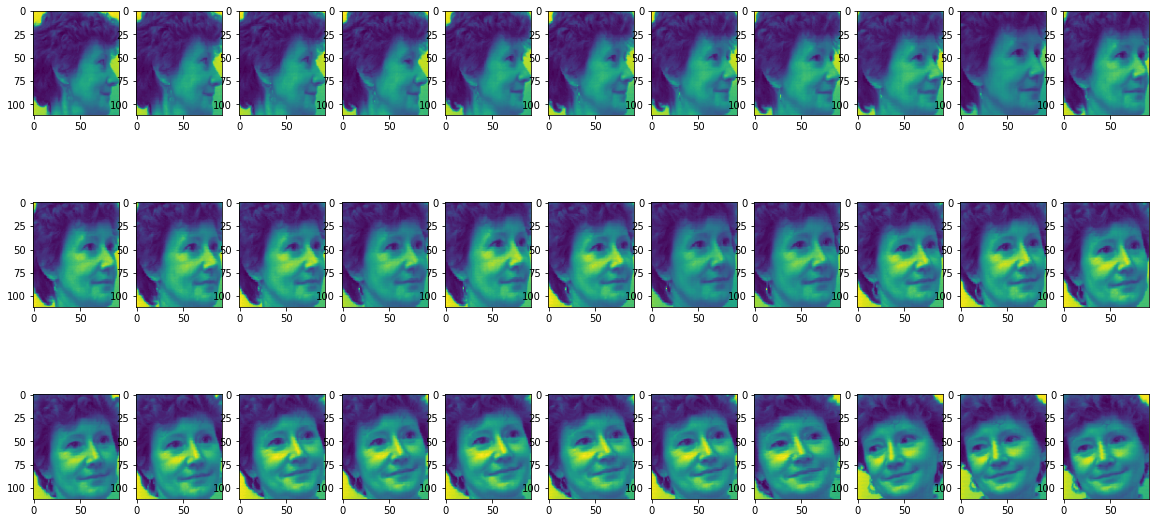

In [ ]:
plt.figure(figsize=(20,10))
for i in range (33): 
  plt.subplot(3, 11, i+1) 
  plt.imshow(Y[:,:,spe_id[i]]) 
plt.show()

Now, we can compare the LLE and LE, when looking the results of both the LLE and LE it is smilar but we are looking into graphs by that there is so dismilar between the LLE and LE

Text(0.5, 1.0, 'Laplacian Eigenmap embedding')

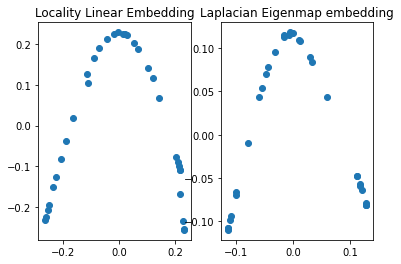

In [ ]:
lle = LocallyLinearEmbedding(n_neighbors=5, n_components=2, method='standard', eigen_solver='auto')
face_lle = lle.fit_transform(X)
plt.subplot(1,2,1)
plt.scatter(face_lle[:, 0], face_lle[:, 1])
plt.title('Locality Linear Embedding')

spe = SpectralEmbedding(n_neighbors=5,n_components=2) 
face_spe = spe.fit_transform(X)
plt.subplot(1,2,2)
plt.scatter(face_spe[:,0],face_spe[:,1])
plt.title('Laplacian Eigenmap embedding')

